<a href="https://colab.research.google.com/github/janzaw04/myTestRep/blob/main/%C4%87wiczenia4regresja%2Boptuna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [58]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 150
low=0
high=12
error=25

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(150,) (150,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning:

divide by zero encountered in log



<function matplotlib.pyplot.show>

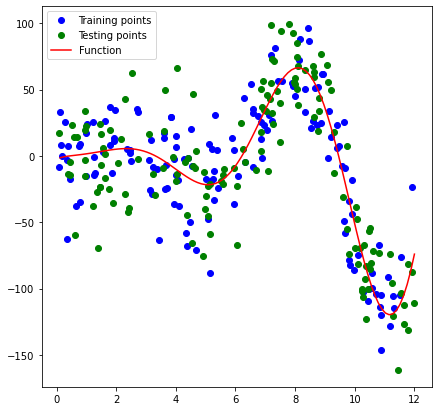

In [59]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show

In [60]:
# Tutaj należy znormalizować dane, i.e. 
# - odjąć średnią
# - podzielić przez odchylenie standardowe

# 
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

# to samo dla X_test
XX_test_n = XX_test - mean
XX_test_n /= std

# A teraz to samo dla yy_train i yy_test
mean1 = yy_train.mean(axis=0)
yy_train_n = yy_train-mean1
std1 = yy_train_n.std(axis=0)
yy_train_n /= std1
# to samo dla y_test
yy_test_n = yy_test - mean1
yy_test_n /= std1

In [61]:
# install optuna
! pip install optuna

In [62]:
import optuna

def objective(trial):
    units = trial.suggest_discrete_uniform('units', 16,2048,1)
    dropout = trial.suggest_uniform('dropout', 0, 0.8)
    act = trial.suggest_categorical('activation', ['relu','sigmoid','linear'])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    
    model0 = Sequential()
    #.......
    model0.add(Dense(units, activation=act, input_shape=(1,)))
    model0.add(Dropout(dropout))
    model0.add(Dense(units, activation=act))
    model0.add(Dropout(dropout))
    model0.add(Dense(1, activation='linear'))

    # early stoping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

    model0.compile(optimizer=Adam(lr=lr),
                    loss='mean_squared_error',
                    metrics=['mse'])

    model0.fit(XX_train_n,yy_train_n, epochs=500, batch_size=512,verbose=0, validation_data=(XX_test_n, yy_test_n), callbacks=[es])

    results = model0.evaluate(XX_test_n, yy_test_n)

    print('loss test data: ', results[0])
    print('mse test data: ', results[1])

    return results[1]



In [63]:
study = optuna.create_study()
study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )

study.optimize(objective, n_trials=20)

study.best_params  # E.g. {'x': 2.0912375440412942, 'y': 1.0091490823506173}

[I 2020-12-08 12:00:32,663] A new study created in memory with name: no-name-37fb6868-6843-4aca-86c2-ffff1e39cd64
[I 2020-12-08 12:00:32,666] A new study created in memory with name: no-name-309399b1-6f31-4c66-9478-0a97e2f43915


Epoch 00066: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 1.1757 - mse: 1.1757


[I 2020-12-08 12:00:34,468] Trial 0 finished with value: 1.1757116317749023 and parameters: {'units': 1566.0, 'dropout': 0.608455933413442, 'activation': 'linear', 'lr': 0.00010479369486410936}. Best is trial 0 with value: 1.1757116317749023.


loss test data:  1.1757116317749023
mse test data:  1.1757116317749023
5/5 [==============================] - 0s 2ms/step - loss: 0.6118 - mse: 0.6118


[I 2020-12-08 12:00:43,229] Trial 1 finished with value: 0.6118298172950745 and parameters: {'units': 56.0, 'dropout': 0.613260274592911, 'activation': 'sigmoid', 'lr': 0.00543293144940597}. Best is trial 1 with value: 0.6118298172950745.


loss test data:  0.6118298172950745
mse test data:  0.6118298172950745
Epoch 00080: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 1.1750 - mse: 1.1750


[I 2020-12-08 12:00:45,262] Trial 2 finished with value: 1.175047516822815 and parameters: {'units': 1155.0, 'dropout': 0.7474745118039717, 'activation': 'linear', 'lr': 0.0001414850743099902}. Best is trial 1 with value: 0.6118298172950745.


loss test data:  1.175047516822815
mse test data:  1.175047516822815
Epoch 00054: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 1.3296 - mse: 1.3296


[I 2020-12-08 12:00:46,641] Trial 3 finished with value: 1.3296476602554321 and parameters: {'units': 1367.0, 'dropout': 0.5649289229399924, 'activation': 'sigmoid', 'lr': 0.024284893225957338}. Best is trial 1 with value: 0.6118298172950745.


loss test data:  1.3296476602554321
mse test data:  1.3296476602554321
Epoch 00194: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 1.1799 - mse: 1.1799


[I 2020-12-08 12:00:50,277] Trial 4 finished with value: 1.1799153089523315 and parameters: {'units': 1745.0, 'dropout': 0.7571128232981162, 'activation': 'linear', 'lr': 0.025252721721650533}. Best is trial 1 with value: 0.6118298172950745.


loss test data:  1.1799153089523315
mse test data:  1.1799153089523315
Epoch 00072: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 1.1751 - mse: 1.1751


[I 2020-12-08 12:00:51,857] Trial 5 finished with value: 1.1750881671905518 and parameters: {'units': 308.0, 'dropout': 0.741094607654609, 'activation': 'linear', 'lr': 0.00019434368835999613}. Best is trial 1 with value: 0.6118298172950745.


loss test data:  1.1750881671905518
mse test data:  1.1750881671905518
Epoch 00337: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 1.1789 - mse: 1.1789


[I 2020-12-08 12:00:57,844] Trial 6 finished with value: 1.1789339780807495 and parameters: {'units': 1635.0, 'dropout': 0.7261625891574386, 'activation': 'linear', 'lr': 0.04708900453228313}. Best is trial 1 with value: 0.6118298172950745.


loss test data:  1.1789339780807495
mse test data:  1.1789339780807495
5/5 [==============================] - 0s 2ms/step - loss: 1.2400 - mse: 1.2400


[I 2020-12-08 12:01:06,632] Trial 7 finished with value: 1.2400474548339844 and parameters: {'units': 1657.0, 'dropout': 0.15882438215913794, 'activation': 'sigmoid', 'lr': 1.0899899974679983e-05}. Best is trial 1 with value: 0.6118298172950745.


loss test data:  1.2400474548339844
mse test data:  1.2400474548339844
5/5 [==============================] - 0s 2ms/step - loss: 1.1717 - mse: 1.1717


[I 2020-12-08 12:01:15,121] Trial 8 finished with value: 1.1717005968093872 and parameters: {'units': 704.0, 'dropout': 0.01588556923498743, 'activation': 'sigmoid', 'lr': 0.0009126092563752785}. Best is trial 1 with value: 0.6118298172950745.


loss test data:  1.1717005968093872
mse test data:  1.1717005968093872
Epoch 00230: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 0.3084 - mse: 0.3084


[I 2020-12-08 12:01:19,260] Trial 9 finished with value: 0.3084108829498291 and parameters: {'units': 1110.0, 'dropout': 0.04790808278497112, 'activation': 'relu', 'lr': 0.0010799239908668764}. Best is trial 9 with value: 0.3084108829498291.


loss test data:  0.3084108829498291
mse test data:  0.3084108829498291
Epoch 00201: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 0.3136 - mse: 0.3136


[I 2020-12-08 12:01:22,864] Trial 10 finished with value: 0.3135738968849182 and parameters: {'units': 823.0, 'dropout': 0.2750447468667447, 'activation': 'relu', 'lr': 0.002350643742856316}. Best is trial 9 with value: 0.3084108829498291.


loss test data:  0.3135738968849182
mse test data:  0.3135738968849182
Epoch 00245: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 0.2939 - mse: 0.2939


[I 2020-12-08 12:01:27,183] Trial 11 finished with value: 0.2939203381538391 and parameters: {'units': 762.0, 'dropout': 0.250486943434799, 'activation': 'relu', 'lr': 0.0019946441437487814}. Best is trial 11 with value: 0.2939203381538391.


loss test data:  0.2939203381538391
mse test data:  0.2939203381538391
Epoch 00445: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 0.3092 - mse: 0.3092


[I 2020-12-08 12:01:34,542] Trial 12 finished with value: 0.3092486262321472 and parameters: {'units': 566.0, 'dropout': 0.01059651133381103, 'activation': 'relu', 'lr': 0.0007051124913061503}. Best is trial 11 with value: 0.2939203381538391.


loss test data:  0.3092486262321472
mse test data:  0.3092486262321472
Epoch 00112: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 0.3155 - mse: 0.3155


[I 2020-12-08 12:01:36,768] Trial 13 finished with value: 0.3155052661895752 and parameters: {'units': 1099.0, 'dropout': 0.20218688324472023, 'activation': 'relu', 'lr': 0.0064470758416236736}. Best is trial 11 with value: 0.2939203381538391.


loss test data:  0.3155052661895752
mse test data:  0.3155052661895752
5/5 [==============================] - 0s 2ms/step - loss: 0.2993 - mse: 0.2993


[I 2020-12-08 12:01:45,111] Trial 14 finished with value: 0.2992593050003052 and parameters: {'units': 879.0, 'dropout': 0.3436528380166316, 'activation': 'relu', 'lr': 0.00033825853681736527}. Best is trial 11 with value: 0.2939203381538391.


loss test data:  0.2992593050003052
mse test data:  0.2992593050003052
5/5 [==============================] - 0s 2ms/step - loss: 1.0124 - mse: 1.0124


[I 2020-12-08 12:01:53,242] Trial 15 finished with value: 1.012425422668457 and parameters: {'units': 452.0, 'dropout': 0.39258737099051644, 'activation': 'relu', 'lr': 1.9641946348104e-05}. Best is trial 11 with value: 0.2939203381538391.


loss test data:  1.012425422668457
mse test data:  1.012425422668457
5/5 [==============================] - 0s 2ms/step - loss: 0.3430 - mse: 0.3430


[I 2020-12-08 12:02:02,068] Trial 16 finished with value: 0.343039333820343 and parameters: {'units': 2047.0, 'dropout': 0.3817485955848035, 'activation': 'relu', 'lr': 4.944671684199537e-05}. Best is trial 11 with value: 0.2939203381538391.


loss test data:  0.343039333820343
mse test data:  0.343039333820343
5/5 [==============================] - 0s 2ms/step - loss: 0.2954 - mse: 0.2954


[I 2020-12-08 12:02:10,294] Trial 17 finished with value: 0.29543572664260864 and parameters: {'units': 867.0, 'dropout': 0.29159727955594356, 'activation': 'relu', 'lr': 0.0003720482585209111}. Best is trial 11 with value: 0.2939203381538391.


loss test data:  0.29543572664260864
mse test data:  0.29543572664260864
Epoch 00434: early stopping
5/5 [==============================] - 0s 3ms/step - loss: 0.2817 - mse: 0.2817


[I 2020-12-08 12:02:17,405] Trial 18 finished with value: 0.2817273437976837 and parameters: {'units': 178.0, 'dropout': 0.476813720818517, 'activation': 'relu', 'lr': 0.003700485566856586}. Best is trial 18 with value: 0.2817273437976837.


loss test data:  0.2817273437976837
mse test data:  0.2817273437976837
Epoch 00189: early stopping
5/5 [==============================] - 0s 2ms/step - loss: 0.2957 - mse: 0.2957


[I 2020-12-08 12:02:21,605] Trial 19 finished with value: 0.2957034409046173 and parameters: {'units': 287.0, 'dropout': 0.5074714287478298, 'activation': 'relu', 'lr': 0.0048011864301330575}. Best is trial 18 with value: 0.2817273437976837.


loss test data:  0.2957034409046173
mse test data:  0.2957034409046173


{'activation': 'relu',
 'dropout': 0.476813720818517,
 'lr': 0.003700485566856586,
 'units': 178.0}

In [64]:
print("Best trial:")
trial = study.best_trial
print(trial)

Best trial:
FrozenTrial(number=18, value=0.2817273437976837, datetime_start=datetime.datetime(2020, 12, 8, 12, 2, 10, 295190), datetime_complete=datetime.datetime(2020, 12, 8, 12, 2, 17, 405224), params={'units': 178.0, 'dropout': 0.476813720818517, 'activation': 'relu', 'lr': 0.003700485566856586}, distributions={'units': DiscreteUniformDistribution(high=2048, low=16, q=1), 'dropout': UniformDistribution(high=0.8, low=0), 'activation': CategoricalDistribution(choices=('relu', 'sigmoid', 'linear')), 'lr': LogUniformDistribution(high=0.1, low=1e-05)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=18, state=TrialState.COMPLETE)


In [65]:
dropout = trial.params.get("dropout")
print(dropout)

0.476813720818517


In [66]:
units = trial.params.get("units")
print(units)

178.0


In [67]:
model0 = Sequential()
#.......
model0.add(Dense(units, activation='relu', input_shape=(1,)))
model0.add(Dropout(dropout))
model0.add(Dense(units, activation='relu'))
model0.add(Dropout(dropout))
model0.add(Dense(1, activation='linear'))

model0.compile(optimizer='adam',
                    loss='mean_squared_error',
                    metrics=['mse'])

es = EarlyStopping(monitor="val_loss", mode='min', verbose=1, patience=50)

model0.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 178)               356       
_________________________________________________________________
dropout_154 (Dropout)        (None, 178)               0         
_________________________________________________________________
dense_232 (Dense)            (None, 178)               31862     
_________________________________________________________________
dropout_155 (Dropout)        (None, 178)               0         
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 179       
Total params: 32,397
Trainable params: 32,397
Non-trainable params: 0
_________________________________________________________________


In [68]:
history = model0.fit(XX_train_n,yy_train_n, epochs=500, batch_size=512, validation_data=(XX_test_n, yy_test_n), callbacks=[es])

Epoch 1/500
1/1 [==============================] - 0s 106ms/step - loss: 0.9901 - mse: 0.9901 - val_loss: 1.2112 - val_mse: 1.2112
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 0.9080 - mse: 0.9080 - val_loss: 1.1859 - val_mse: 1.1859
Epoch 3/500
1/1 [==============================] - 0s 17ms/step - loss: 0.9308 - mse: 0.9308 - val_loss: 1.1662 - val_mse: 1.1662
Epoch 4/500
1/1 [==============================] - 0s 17ms/step - loss: 0.9100 - mse: 0.9100 - val_loss: 1.1498 - val_mse: 1.1498
Epoch 5/500
1/1 [==============================] - 0s 16ms/step - loss: 0.9229 - mse: 0.9229 - val_loss: 1.1371 - val_mse: 1.1371
Epoch 6/500
1/1 [==============================] - 0s 15ms/step - loss: 0.8856 - mse: 0.8856 - val_loss: 1.1255 - val_mse: 1.1255
Epoch 7/500
1/1 [==============================] - 0s 16ms/step - loss: 0.8954 - mse: 0.8954 - val_loss: 1.1147 - val_mse: 1.1147
Epoch 8/500
1/1 [==============================] - 0s 16ms/step - loss: 0.8686 - mse: 0.8

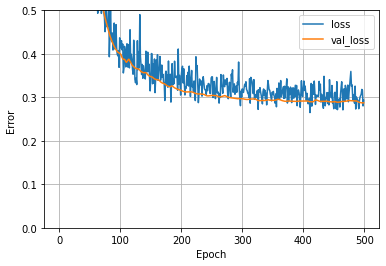

In [69]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [70]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.2875 - mse: 0.2875
loss test data:  0.2874968349933624
mse test data:  0.2874968349933624
5/5 [==============================] - 0s 2ms/step - loss: 0.2728 - mse: 0.2728
loss train data:  0.27284443378448486
mse train data:  0.27284443378448486


<function matplotlib.pyplot.show>

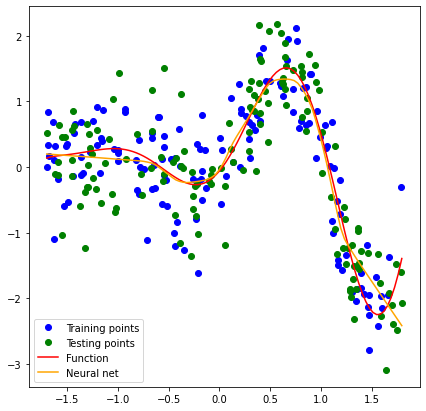

In [71]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-mean1)/std1,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')


plt.legend()


plt.show

## Visualizing the Optimization History

In [72]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [73]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study)

## Visualizing Parameter Relationships

In [74]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [75]:
plot_contour(study, params=['units', 'dropout'])

## Visualizing Individual Parameters

In [76]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [77]:
plot_slice(study, params=['units', 'dropout'])

## Visualizing Parameter Importances

In [78]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)